# PAP2 V234: Lichtquellen

In [1]:
#Module importieren: 
#%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import scipy.constants as sc

(250, 900)

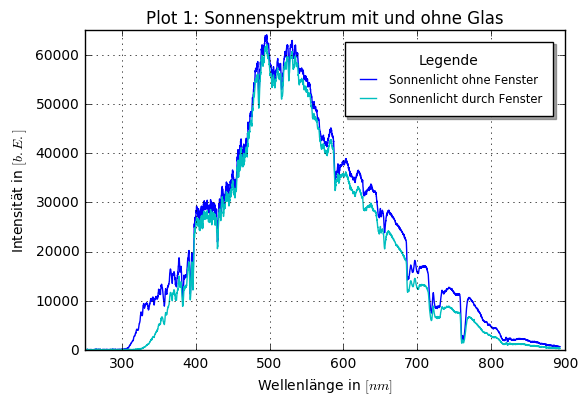

In [2]:
#Aufgabe 1: Sonnenspektrum mit und ohne Fenster

#Funktion um Komma durch Punkte in einzulesender Datei zu ersetzen: 
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

#Einlesen der Wellenlängen und Intensitäten von Himmelslicht
l1, i1=np.loadtxt('data/spec1_himmel.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Einlesen Sonnenlicht durch Fenster
l2, i2=np.loadtxt('data/spec2_fenster.txt', skiprows=17, converters= {0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Auftragen der beiden Spektren in ein gemeinsames Diagramm: 
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.plot(l1, i1, label='Sonnenlicht ohne Fenster', color='b')
ax.plot(l2, i2, label='Sonnenlicht durch Fenster', color='c')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.set_title("Plot 1: Sonnenspektrum mit und ohne Glas")
ax.legend(title="Legende", borderpad=1.0, borderaxespad=1, loc='best', shadow='true', fontsize='small')
ax.grid(True)
ax.set_ylim((0, 65000))
ax.set_xlim((250, 900))

#fig.savefig("v234_1.pdf", format="pdf")

(0, 1)

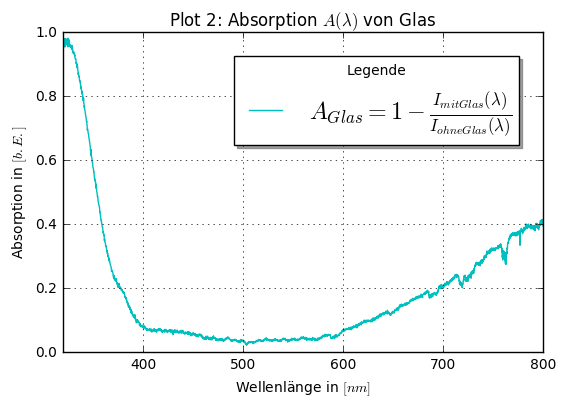

In [3]:
#Aufgabe 2: Absorption von Glas

#Absorption berechnen
A = 1-((i2/i1)) #Absorption Eins minus (mit Glas)/(ohne Glas)

#Plotten 
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 2: Absorption $A(\lambda)$ von Glas")
ax.plot(l2, A, label='$A_{Glas}=1-\\frac{I_{mit Glas}(\lambda)}{I_{ohne Glas}(\lambda)}$', color='c')

ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Absorption in $[b.E.]$")
ax.legend(title="Legende", borderpad=0.30, borderaxespad=1, loc='best', shadow='true', fontsize='xx-large')
ax.grid(True)
ax.set_xlim((320, 800))
ax.set_ylim((0, 1))

#fig.savefig("v234_2.pdf", format="pdf")

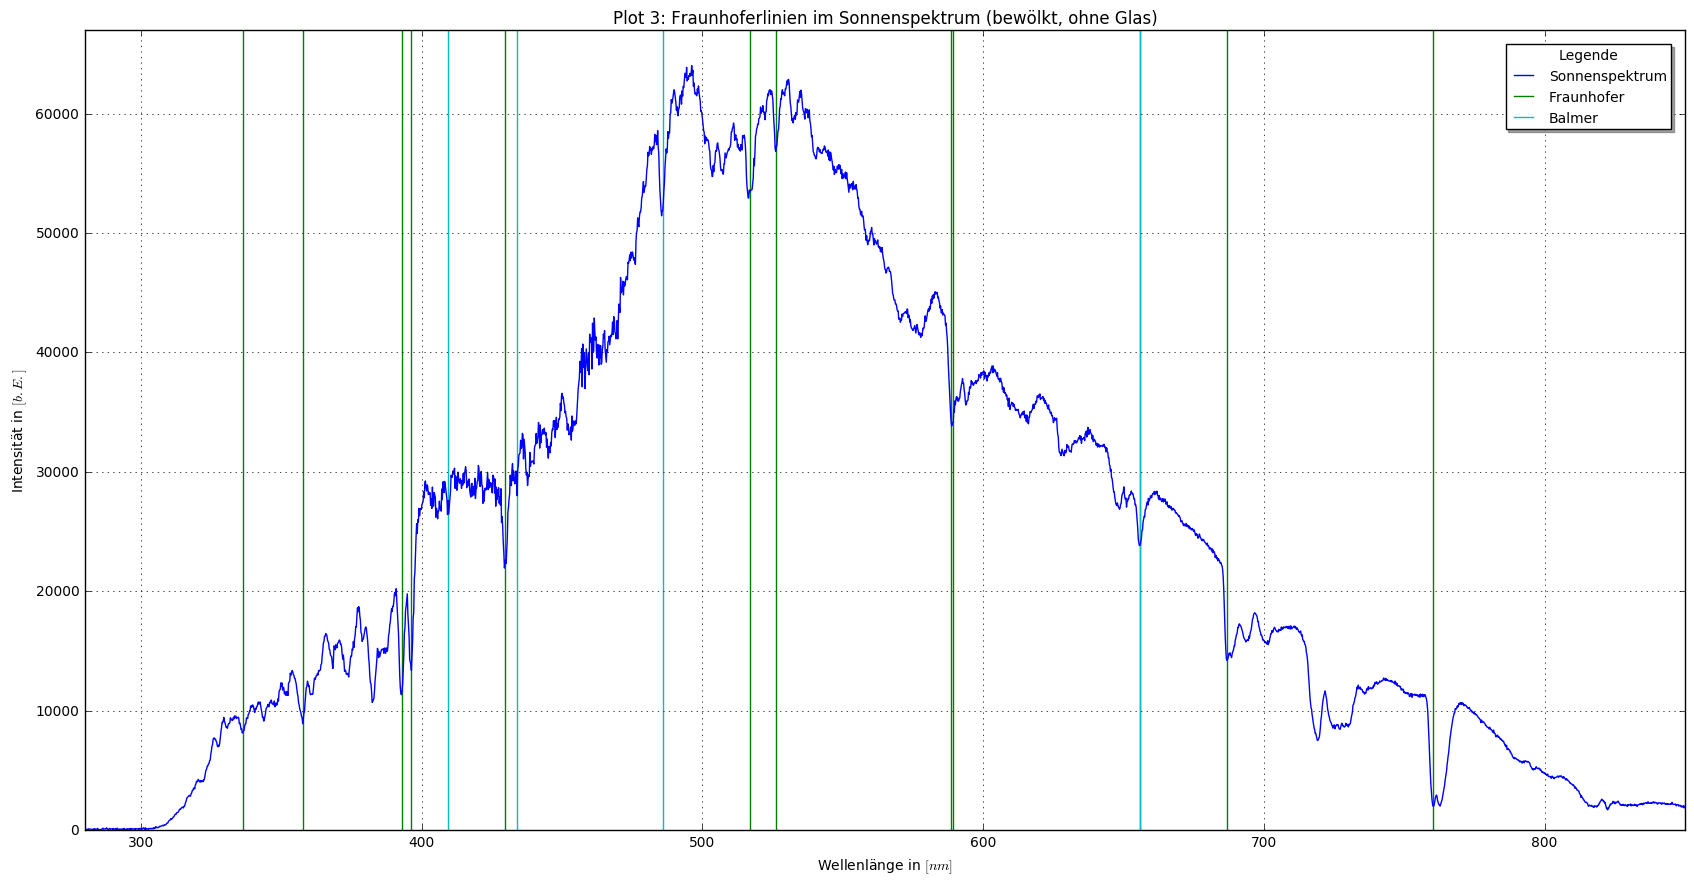

In [24]:
#Aufgabe 3: Fraunhofer 

import matplotlib.pyplot as plt 
import numpy as np
import scipy.constants as sc
#%matplotlib notebook
%matplotlib inline

#Funktion um Komma durch Punkte in einzulesender Datei zu ersetzen: 
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

#Einlesen der Wellenlängen und Intensitäten von Himmelslicht
l1, i1=np.loadtxt('data/spec1_himmel.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Plotten 
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 3: Fraunhoferlinien im Sonnenspektrum (bewölkt, ohne Glas)")
ax.plot(l1, i1, label='Sonnenspektrum', color='b')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.vlines([760.3,686.9, 655.8, 588.5, 589.2, 526.2, 517.0, 429.8, 396.2, 392.8, 357.6 ,336.2],0, 70000, linestyle='solid', label='Fraunhofer', color='g')
ax.vlines([409.5, 434.0, 485.8, 655.9], 0, 70000, linestyle='solid', label='Balmer', color='c')
ax.legend(title="Legende", borderpad=0.30, borderaxespad=1, loc='best', shadow='true', fontsize='medium')
ax.grid(True)
ax.set_xlim((280, 850))
ax.set_ylim((0, 67000))

#fig.savefig("v234_3.pdf", format="pdf")

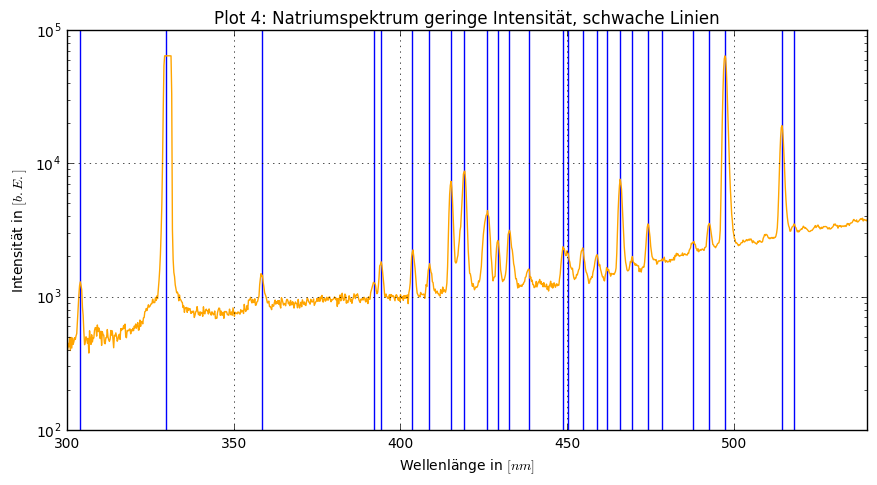

In [14]:
#Aufgabe 4: Natriumspektrum schwache Linien

#%matplotlib notebook
%matplotlib inline

#Funktion um Komma durch Punkte in einzulesender Datei zu ersetzen: 
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

#Einlesen der Wellenlängen und Intensitäten von Natrium kleiner Intensitäten
l3, i3=np.loadtxt('data/spec81_Natrium_klein_400_bis_540.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Plotten 
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 4: Natriumspektrum geringe Intensität, schwache Linien")
ax.plot(l3, i3, color='orange')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.set_xlim((300, 540))
ax.set_ylim((100, 100000))
ax.set_yscale('log')
ax.grid(True)
ax.vlines([304, 329.7, 358.4,  392.0, 394.1, 403.6, 408.6, 415.1, 419.1, 425.9, 429.2, 432.7, 438.5, 448.8, 450.2, 454.7, 458.9, 462.0, 466.0, 469.4, 474.3, 478.5, 487.7, 492.6, 497.4, 514.4, 518.1, 568.0, 615.4, 672.8, 696.0, 706.2, 726.8, 737.9, 750.7, 763.0, 771.9, 794.3, 800.6, 810.8, 819.0, 826.0, 840.4, 842.0], 0, 100000, color='b')

#fig.savefig("v234_4.pdf", format="pdf")

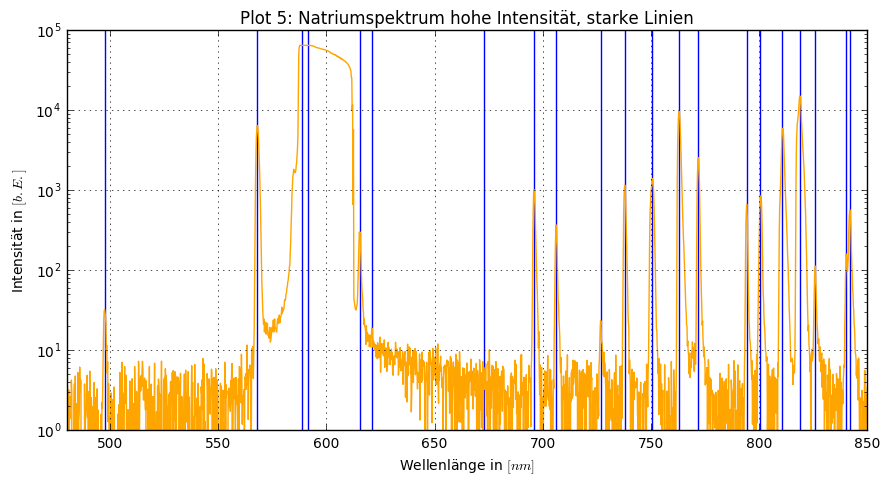

In [13]:
#Aufgabe 4: Natriumspektrum starke Linien

#%matplotlib notebook
%matplotlib inline

#Funktion um Komma durch Punkte in einzulesender Datei zu ersetzen: 
def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

#Einlesen der Wellenlängen und Intensitäten von Natrium ganz hoher Intensitäten
l4, i4=np.loadtxt('data/spec82_Natrium_D_Linie.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Einlesen der Wellenlängen und Intensitäten von Natrium hoher Intensitäten
l5, i5=np.loadtxt('data/spec83_Natrium_große_565_bis_620.txt', skiprows=17, converters={0:comma_to_float, 1:comma_to_float}, comments='>', unpack=True)

#Plotten 
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 5: Natriumspektrum hohe Intensität, starke Linien")
ax.plot(l5, i5, color='orange')
ax.set_xlabel(r"Wellenlänge in $[nm]$")
ax.set_ylabel(r"Intensität in $[b.E.]$")
ax.set_xlim((480, 850))
ax.set_ylim((1, 100000))
ax.set_yscale('log')
ax.grid(True)
ax.vlines([329.7, 497.4, 568.0, 588.9, 591.4, 615.4, 621.0, 672.8, 696.0, 706.2, 726.8, 737.9, 750.7, 763.0, 771.9, 794.3, 800.6, 810.8, 819.0, 826.0, 840.4, 842.0], 0, 100000, color='b')

#ax2 = fig.add_axes([0.17,0.58,0.3,0.3])
#ax2.set_title("Plot 5: Natriumspektrum hoher Intensität, starke Linien")
#ax2.plot(l4, i4, color='orange')
#ax2.set_xlabel(r"Wellenlänge in $[nm]$")
#ax2.set_ylabel(r"Intensität in $[b.E.]$")
#ax2.set_xlim((300, 850))
#ax2.set_ylim((10, 100000))
#ax2.set_yscale('log')
#ax2.grid(True)

#fig.savefig("v234_5.pdf", format="pdf")

In [11]:
#Nebenserie: Berechnung der erwarteten Wellenlängen
E_3p = -3.025 #für lambda = 819,0
for m in range(3,13):
    l=1.2398E3/(-13.605/m**2-E_3p)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

m= 3, lambda=819.25
m= 4, lambda=570.10
m= 5, lambda=499.76
m= 6, lambda=468.36
m= 7, lambda=451.27
m= 8, lambda=440.83
m= 9, lambda=433.95
m=10, lambda=429.15
m=11, lambda=425.67
m=12, lambda=423.06


E_Ry= -13.6367805113 , Standardfehler= 0.691851962664
E_3p= -3.02698416843 , Standardfehler= 0.00846487331077
D_d= -0.00407068031846 , Standardfehler= 0.0738458288742
chi2=  28.2421776247
chi2_red=  4.70702960412
Fitwahrscheinlichkeit=  0.0


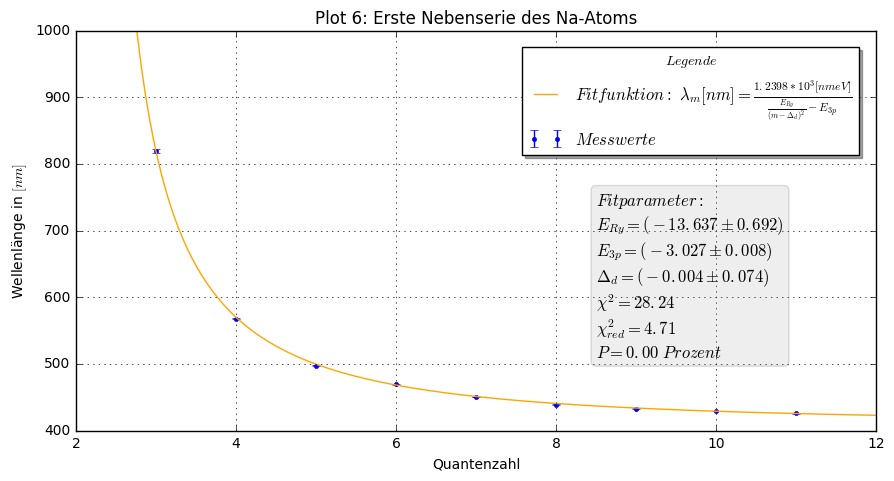

In [15]:
# Korrekturfaktoren

#Erste Nebenserie
wellenl=np.array([819,568,497.4,469.4,450.2,438.5,432.7,429.2,425.9])
fehler=np.array([3,1.3,1.1,0.4,0.5,0.8,0.7,0.4,0.8]) 
quantenz=np.arange(3,12)

from scipy.optimize import curve_fit 
def fit_func(m, E_Ry, E_3p, D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler ,p0=para)
perr=np.sqrt(np.diag(pcov))
x=np.linspace(2.5,12,1000)

print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0])) 
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1])) 
print("D_d=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))

chisquare=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2) 
dof=len(quantenz)-3 #dof:degrees of freedom, Freiheitsgrad chi2_red=chi2_/dof
chisquare_red=chisquare/dof
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100 
print("chi2= ", chisquare)
print("chi2_red= ",chisquare_red)
print("Fitwahrscheinlichkeit= ", prob)

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 6: Erste Nebenserie des Na-Atoms")
ax.errorbar(quantenz, wellenl, yerr=fehler, fmt=".", label='$Messwerte$')
ax.plot(x, fit_func(x, *popt),color='orange', label='$Fitfunktion:$ $\lambda_{m}[nm]=\\frac{1.2398*10^3[nm eV]}{\\frac{E_{Ry}}{(m-\Delta_{d})^2}-E_{3p}}$')
ax.legend(title="$Legende$", borderpad=0.40, borderaxespad=1, loc='best', shadow='true', fontsize='large')
ax.set_xlabel(r"Quantenzahl")
ax.set_ylabel(r"Wellenlänge in $[nm]$")
ax.set_xlim((2, 12))
ax.set_ylim((400, 1000))
ax.grid(True)

textstr ='$Fitparameter:$ \n\
$E_{Ry}=(%.3f \pm%.3f)$\n\
$E_{3p}=(%.3f \pm%.3f)$ \n\
$\Delta_{d}=(%.3f \pm%.3f)$ \n\
$\chi^{2}=%.2f$ \n\
$\chi_{red}^{2}=%.2f$ \n\
$P=%.2f\ Prozent$' %(popt[0], perr[0], popt[1], perr[1], popt[2], perr[2], chisquare, chisquare_red, prob)

props=dict(boxstyle='round', facecolor='grey', alpha=0.13)
ax.text(0.65, 0.6, textstr, transform=ax.transAxes, fontsize='large', verticalalignment='top', bbox=props)

#fig.savefig("v234_6.pdf", format="pdf")

E_Ry= -13.9647942223 , Standardfehler= 3.48871548575
E_3p= -3.02708154508 , Standardfehler= 0.0538332708957
D_d= 1.31808373599 , Standardfehler= 0.368935681892
chi2=  5.50359330486
chi2_red=  5.50359330486
Fitwahrscheinlichkeit=  2.0


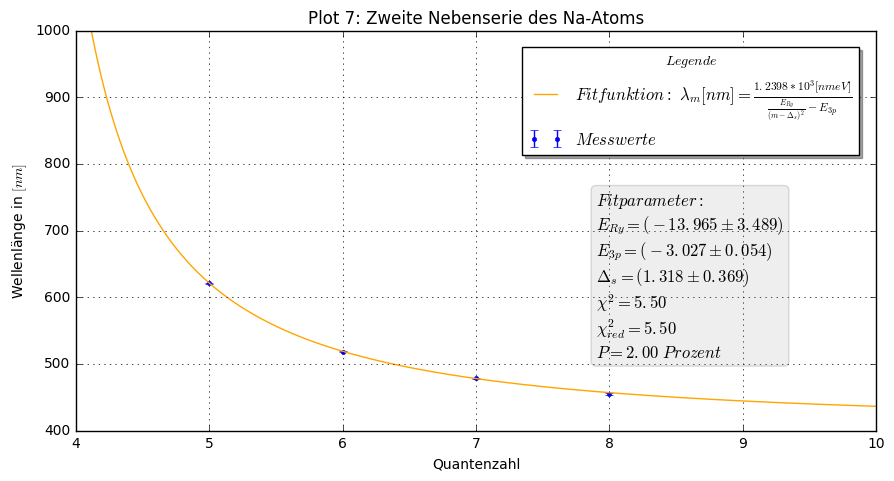

In [17]:
#Zweite Nebenserie

wellenl=np.array([621.0, 518.1, 478.5, 454.7])
fehler=np.array([1.0, 0.7, 0.5, 1.2]) 
quantenz=np.arange(5,9)

from scipy.optimize import curve_fit 
def fit_func(m, E_Ry, E_3p, D_s):
    return 1.2398E3/(E_Ry/(m-D_s)**2-E_3p)

para = [-7.25,-2.95, 2.4]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler ,p0=para)
perr=np.sqrt(np.diag(pcov))
x=np.linspace(4,12,1000)

print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0])) 
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1])) 
print("D_d=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))

chisquare=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2) 
dof=len(quantenz)-3 #dof:degrees of freedom, Freiheitsgrad chi2_red=chi2_/dof
chisquare_red=chisquare/dof
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100 
print("chi2= ", chisquare)
print("chi2_red= ",chisquare_red)
print("Fitwahrscheinlichkeit= ", prob)

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0.13,0.13,0.8,0.8])
ax.set_title("Plot 7: Zweite Nebenserie des Na-Atoms")
ax.errorbar(quantenz, wellenl, yerr=fehler, fmt=".", label='$Messwerte$')
ax.plot(x, fit_func(x, *popt), color='orange', label='$Fitfunktion:$ $\lambda_{m}[nm]=\\frac{1.2398*10^3[nm eV]}{\\frac{E_{Ry}}{(m-\Delta_{s})^2}-E_{3p}}$')
ax.legend(title="$Legende$", borderpad=0.40, borderaxespad=1, loc='best', shadow='true', fontsize='large')
ax.set_xlabel(r"Quantenzahl")
ax.set_ylabel(r"Wellenlänge in $[nm]$")
ax.set_xlim((4, 10))
ax.set_ylim((400, 1000))
ax.grid(True)

textstr ='$Fitparameter:$ \n\
$E_{Ry}=(%.3f \pm %.3f)$\n\
$E_{3p}=(%.3f \pm %.3f)$ \n\
$\Delta_{s}=(%.3f \pm %.3f)$ \n\
$\chi^{2}=%.2f$ \n\
$\chi_{red}^{2}=%.2f$ \n\
$P=%.2f\ Prozent$' %(popt[0], perr[0], popt[1], perr[1], popt[2], perr[2], chisquare, chisquare_red, prob)

props=dict(boxstyle='round', facecolor='grey', alpha=0.13)
ax.text(0.65, 0.6, textstr, transform=ax.transAxes, fontsize='large', verticalalignment='top', bbox=props)

#fig.savefig("v234_7.pdf", format="pdf")